# The Sparks Foundations Internship Tasks
Internship Type: Data Science and Business Analytics

Task 1: Prediction using Supervised ML

Objective: Predict the percentage of Student based on number of hours studied

Data: http://bit.ly/w-data

Author: Sanket Mohanty

Date: 19-10-2021

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

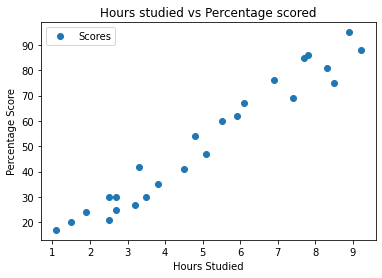

In [4]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours studied vs Percentage scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

**Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [6]:
# Using Scikit-Learn's built-in train_test_split() method to split this data into training and test sets:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 


In [7]:
#Training Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


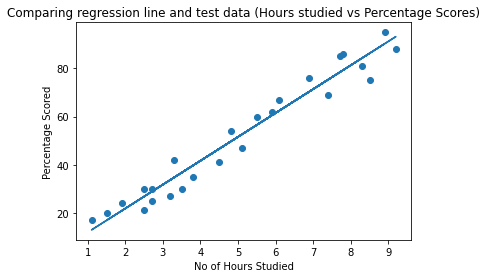

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Comparing regression line and test data (Hours studied vs Percentage Scores)')
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Scored')
plt.show()
print(data.corr())

In [9]:
# Using trained model to make predictions
pred_y = regressor.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction


,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [10]:
# Comparing Actual data with your Predicted data
df = pd.DataFrame({'Actual Marks':y_test , 'Predicted Marks': pred_y})
df

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


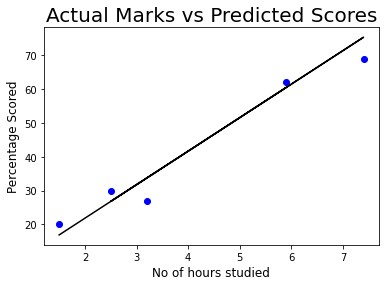

In [11]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, pred_y, color='black')
plt.title('Actual Marks vs Predicted Scores', size=20)
plt.ylabel('Percentage Scored', size=12)
plt.xlabel('No of hours studied', size=12)
plt.show()

In [12]:
#Importing mean absolute error
from sklearn.metrics import mean_absolute_error
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [13]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692
